# one-off preparation of the database

In [41]:
!lamin init --storage ~/scprint --schema bionty

2023-12-13 16:40:32,919:INFO - HTTP Request: GET https://hub.lamin.ai/rest/v1/instance?select=%2A%2C%20account%21inner%21fk_instance_account_id_account%28%2A%29&account.handle=eq.jkobject&name=eq.scprint "HTTP/1.1 401 Unauthorized"
2023-12-13 16:40:33,431:INFO - HTTP Request: POST https://hub.lamin.ai/auth/v1/token?grant_type=password "HTTP/1.1 200 OK"
2023-12-13 16:40:33,745:INFO - HTTP Request: POST https://hub.lamin.ai/auth/v1/logout "HTTP/1.1 204 No Content"
2023-12-13 16:40:34,089:INFO - HTTP Request: GET https://hub.lamin.ai/rest/v1/instance?select=%2A%2C%20account%21inner%21fk_instance_account_id_account%28%2A%29&account.handle=eq.jkobject&name=eq.scprint "HTTP/1.1 200 OK"
2023-12-13 16:40:34,367:INFO - HTTP Request: GET https://hub.lamin.ai/rest/v1/account?select=%2A&handle=eq.jkobject "HTTP/1.1 200 OK"
2023-12-13 16:40:34,487:INFO - HTTP Request: GET https://hub.lamin.ai/rest/v1/instance?select=%2A&account_id=eq.8292b4ae-8139-4cff-ade2-fd6447734471&name=eq.scprint "HTTP/1.1 20

In [1]:
from scprint import data_utils

import lamindb as ln
import lnschema_bionty as lb
import pandas as pd

%load_ext autoreload
%autoreload 2

💡 lamindb instance: jkobject/scprint


In [4]:
import scanpy as sc 

In [11]:
ln.Artifact.filter(description="preprocessed by scprint")[3].load(stream=True)

AnnData object with n_obs × n_vars = 246946 × 70116
    obs: 'tissue_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'age', 'days_since_hospitalized', 'donor_id', 'severity', 'dsm_severity_score', 'ever_admitted_to_icu', 'days_since_onset', 'timepoint', 'dsm_severity_score_group', 'outcome', 'material_type', 'development_stage_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'out

In [ ]:
adata = _

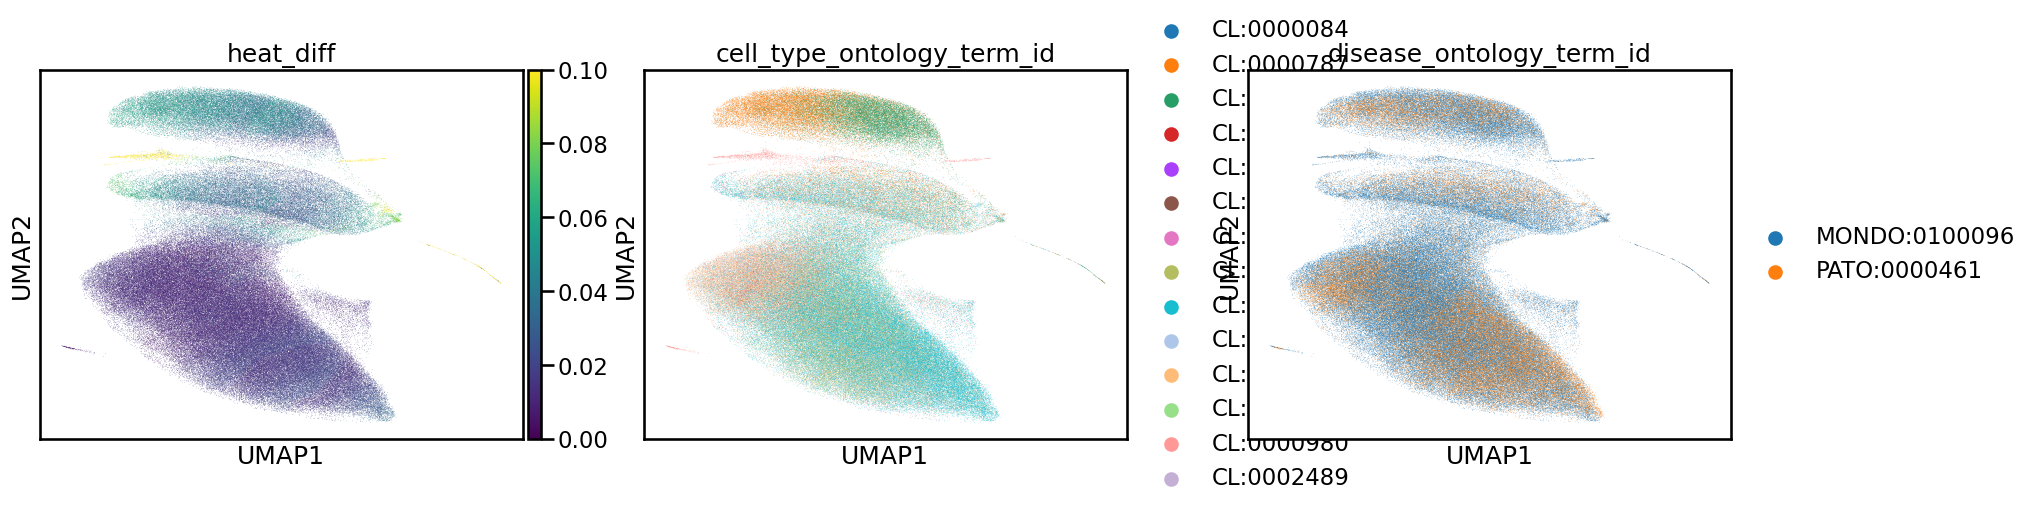

In [15]:
sc.pl.embedding(_, color=["heat_diff", "cell_type_ontology_term_id", "disease_ontology_term_id"], basis="umap", vmax=0.1)


In [2]:
lb.settings.organism = "human"

## prepare lamin database

In [44]:
cx_dataset = ln.Dataset.using("laminlabs/cellxgene").one()
cx_dataset

2023-12-13 16:40:39,699:INFO - HTTP Request: GET https://hub.lamin.ai/rest/v1/instance?select=%2A%2C%20account%21inner%21fk_instance_account_id_account%28%2A%29&account.handle=eq.laminlabs&name=eq.cellxgene "HTTP/1.1 401 Unauthorized"
2023-12-13 16:40:40,203:INFO - HTTP Request: POST https://hub.lamin.ai/auth/v1/token?grant_type=password "HTTP/1.1 200 OK"
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/gotrue/helpers.py:55: ResourceWarning: unclosed <ssl.SSLSocket fd=79, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('10.20.53.10', 52290), raddr=('172.64.149.149', 443)>
  return model.json()
2023-12-13 16:40:40,511:INFO - HTTP Request: POST https://hub.lamin.ai/auth/v1/logout "HTTP/1.1 204 No Content"
2023-12-13 16:40:40,835:INFO - HTTP Request: GET https://hub.lamin.ai/rest/v1/instance?select=%2A%2C%20account%21inner%21fk_instance_account_id_account%28%2A%29&account.handle=eq.laminlabs&name=eq.cellxgene "HTTP/1.1 200 OK"
2023-12-13 16:40:4

Dataset(uid='OirHTWDrudY2TYltvIX1', name='cellxgene-census', version='2023-07-25', hash='pEJ9uvIeTLvHkZW2TBT5', visibility=1, updated_at=2023-11-28 21:46:40 UTC, transform_id=11, run_id=16, created_by_id=1)

In [45]:
len(cx_dataset.files.all())

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/pygments/regexopt.py:77: ResourceWarning: unclosed <ssl.SSLSocket fd=86, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('10.20.53.10', 52300), raddr=('172.64.149.149', 443)>
  '|'.join(regex_opt_inner(list(group[1]), '')


AttributeError: 'Dataset' object has no attribute 'files'

In [ ]:
mydataset = data_utils.load_dataset_local(lb, cx_dataset, "~/scprint/", name="cellxgene-local", description="the full cellxgene database", only=(21,200))

❗ no run & transform get linked, consider passing a `run` or calling ln.track()


❗ record with EtxwAoHUyGTdCB8swqaf already exists on default database: File(uid='EtxwAoHUyGTdCB8swqaf', key='cell-census/2023-07-25/h5ads/0738f538-ff2f-4346-b2eb-72704c291188.h5ad', suffix='.h5ad', accessor='AnnData', description='High Resolution Slide-seqV2 Spatial Transcriptomics Enables Discovery of Disease-Specific Cell Neighborhoods and Pathways', size=12110480, hash='8PORLeHJm9wYZ5MUc4AlSw-2', hash_type='md5-n', visibility=1, key_is_virtual=False, updated_at=2023-11-28 22:44:40 UTC, storage_id=2, transform_id=11, run_id=16, created_by_id=1)
File cell-census/2023-07-25/h5ads/0738f538-ff2f-4346-b2eb-72704c291188.h5ad already exists in storage
❗ no run & transform get linked, consider passing a `run` or calling ln.track()
File cell-census/2023-07-25/h5ads/07428d73-fdea-4bd4-a801-94b00c4d961c.h5ad already exists in storage
❗ no run & transform get linked, consider passing a `run` or calling ln.track()


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/asyncio/sslproto.py:320: ResourceWarning: unclosed transport <asyncio.sslproto._SSLProtocolTransport object at 0x7f8b49dda980>
  _warn(f"unclosed transport {self!r}", ResourceWarning, source=self)


File cell-census/2023-07-25/h5ads/07854d9c-5375-4a9b-ac34-fa919d3c3686.h5ad already exists in storage
❗ no run & transform get linked, consider passing a `run` or calling ln.track()


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/asyncio/sslproto.py:320: ResourceWarning: unclosed transport <asyncio.sslproto._SSLProtocolTransport object at 0x7f8b450b9420>
  _warn(f"unclosed transport {self!r}", ResourceWarning, source=self)


File cell-census/2023-07-25/h5ads/07b1d7c8-5c2e-42f7-9246-26f746cd6013.h5ad already exists in storage
❗ no run & transform get linked, consider passing a `run` or calling ln.track()


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/asyncio/sslproto.py:320: ResourceWarning: unclosed transport <asyncio.sslproto._SSLProtocolTransport object at 0x7f8b49b798a0>
  _warn(f"unclosed transport {self!r}", ResourceWarning, source=self)


File cell-census/2023-07-25/h5ads/08e94873-c2a6-4f7d-ab72-aeaff3e3f929.h5ad already exists in storage
❗ no run & transform get linked, consider passing a `run` or calling ln.track()


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/asyncio/sslproto.py:320: ResourceWarning: unclosed transport <asyncio.sslproto._SSLProtocolTransport object at 0x7f8b4514e200>
  _warn(f"unclosed transport {self!r}", ResourceWarning, source=self)


File cell-census/2023-07-25/h5ads/090da8ea-46e8-40df-bffc-1f78e1538d27.h5ad already exists in storage
❗ no run & transform get linked, consider passing a `run` or calling ln.track()


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/asyncio/sslproto.py:320: ResourceWarning: unclosed transport <asyncio.sslproto._SSLProtocolTransport object at 0x7f8b47684b80>
  _warn(f"unclosed transport {self!r}", ResourceWarning, source=self)


File cell-census/2023-07-25/h5ads/095940cb-7422-4510-96e2-cbafd961eb88.h5ad already exists in storage
❗ no run & transform get linked, consider passing a `run` or calling ln.track()


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/asyncio/sslproto.py:320: ResourceWarning: unclosed transport <asyncio.sslproto._SSLProtocolTransport object at 0x7f8b44f692a0>
  _warn(f"unclosed transport {self!r}", ResourceWarning, source=self)


File cell-census/2023-07-25/h5ads/0a21f80c-e7a3-465b-8aba-fdda2b4c36bc.h5ad already exists in storage
❗ no run & transform get linked, consider passing a `run` or calling ln.track()


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/asyncio/sslproto.py:320: ResourceWarning: unclosed transport <asyncio.sslproto._SSLProtocolTransport object at 0x7f8b491f8ee0>
  _warn(f"unclosed transport {self!r}", ResourceWarning, source=self)


File cell-census/2023-07-25/h5ads/0ae96eac-ff08-4870-9bc3-cd12418af7e4.h5ad already exists in storage
❗ no run & transform get linked, consider passing a `run` or calling ln.track()


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/asyncio/sslproto.py:320: ResourceWarning: unclosed transport <asyncio.sslproto._SSLProtocolTransport object at 0x7f8b450bb0a0>
  _warn(f"unclosed transport {self!r}", ResourceWarning, source=self)


File cell-census/2023-07-25/h5ads/0b4a15a7-4e9e-4555-9733-2423e5c66469.h5ad already exists in storage
❗ no run & transform get linked, consider passing a `run` or calling ln.track()


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/asyncio/sslproto.py:320: ResourceWarning: unclosed transport <asyncio.sslproto._SSLProtocolTransport object at 0x7f8b49b7a0e0>
  _warn(f"unclosed transport {self!r}", ResourceWarning, source=self)


File cell-census/2023-07-25/h5ads/0b75c598-0893-4216-afe8-5414cab7739d.h5ad already exists in storage
❗ no run & transform get linked, consider passing a `run` or calling ln.track()


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/asyncio/sslproto.py:320: ResourceWarning: unclosed transport <asyncio.sslproto._SSLProtocolTransport object at 0x7f8b49dda980>
  _warn(f"unclosed transport {self!r}", ResourceWarning, source=self)


File cell-census/2023-07-25/h5ads/0ba636a1-4754-4786-a8be-7ab3cf760fd6.h5ad already exists in storage



## load some known ontology names

In [ ]:
#you can also load it back
mydataset = ln.Dataset.filter(name="cellxgene-local").one()

In [ ]:
import cellxgene_census

census = cellxgene_census.open_soma(census_version = "latest")
val_to_get = ['self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id']
df = census["census_data"]["homo_sapiens"].obs.read(column_names=val_to_get, value_filter="is_primary_data == True").concat().to_pandas()
df2 = census["census_data"]["mus_musculus"].obs.read(column_names=val_to_get, value_filter="is_primary_data == True").concat().to_pandas()
df.shape

(39055600, 6)

In [ ]:
data_utils.populate_my_ontology(lb=lb,
    organisms=["NCBITaxon:10090", "NCBITaxon:9606"],
    sex=["PATO:0000384", "PATO:0000383"],
    ethnicities=df['self_reported_ethnicity_ontology_term_id'].unique().tolist(),
    assays=list(set(df['assay_ontology_term_id'].unique()).union(df2['assay_ontology_term_id'].unique())) + ['EFO:0010961'],
    tissues=list(set(df['tissue_ontology_term_id'].unique()).union(df2['tissue_ontology_term_id'].unique())),
    # we load all possible diseases. makes it easier
    #diseases=list(set(df['disease_ontology_term_id'].unique()).union(df2['disease_ontology_term_id'].unique())),
    dev_stages=list(df['development_stage_ontology_term_id'].unique()),)

❗ now recursing through parents: this only happens once, but is much slower than bulk saving
❗ now recursing through parents: this only happens once, but is much slower than bulk saving


In [ ]:
import bionty as bt

bionty_source_ds_mouse = lb.BiontySource.filter(entity="DevelopmentalStage", organism="mouse").one()
records = lb.DevelopmentalStage.from_values(df2['development_stage_ontology_term_id'].unique().tolist(), field=lb.DevelopmentalStage.ontology_id, bionty_source=bionty_source_ds_mouse)
ln.save(records)

❗ now recursing through parents: this only happens once, but is much slower than bulk saving


In [ ]:
assay = ['EFO:0010961']

In [ ]:
records = lb.ExperimentalFactor.from_values(assay, field=lb.ExperimentalFactor.ontology_id)
ln.save(records)

❗ now recursing through parents: this only happens once, but is much slower than bulk saving


## add some missing ontology names

In [ ]:
from scprint.dataset.utils import get_ancestry_mapping

In [ ]:
additional_tissues = {
    "UBERON:0037144": "wall of heart",
    "UBERON:0003929": "digestive tract epithelium",
    "UBERON:0002020": "gray matter",
    "UBERON:0000200": "gyrus",
    "UBERON:0000101": "lobe of lung",
    "UBERON:0001981": "blood vessel",
    "UBERON:0001474": "bone element",
}

additional_diseases = {
    "MONDO:0001106": "kidney failure",
    "MONDO:0021166": "inflammatory disease",
    "MONDO:0004992": "cancer",
    "MONDO:0004994": "cardiomyopathy",
    "MONDO:0700065": "trisomy",
    "MONDO:0021042": "glioma",
    "MONDO:0005265": "inflammatory bowel disease",
    "MONDO:0005550": "infectious disease",
    "MONDO:0005059": "leukemia",
}

additional_assays = {
    "EFO:0010184": "Smart-like",
}


Did it using the code below to figure out things we might want to add etc..

In [ ]:
mapping, anc, leafs = get_ancestry_mapping(df['tissue_ontology_term_id'].unique(), lb.Tissue.filter().df(include=["parents__ontology_id"]).set_index("ontology_id"))
# getting only the leaves for which we don't have a parent
leafs = list(leafs - set.union(*[mapping[val] for val in mapping.keys()]))

In [ ]:
lb.Tissue.search(list(leafs)[108], field="ontology_id",return_queryset=True).first().view_parents()

## Preprocessing

In [ ]:
from scprint.dataset.preprocess import Preprocessor
import scanpy as sc
import numpy as np


In [ ]:
def additional_preprocess(adata):
    adata.obs = adata.obs.replace({'self_reported_ethnicity_ontology_term_id':{
        'multiethnic':'unknown',
        'American':'unknown',
        'Jewish Israeli': 'unknown',
        'na':'unknown',
    }}) #multi ethnic will have to get renamed
    adata.obs['cell_culture'] = False
    # if cell_type contains the word "(cell culture)" then it is a cell culture and we mark it as so and remove this from the cell type
    loc = adata.obs['cell_type_ontology_term_id'].str.contains("(cell culture)")
    if loc.sum()>0:
        adata.obs.loc[loc, 'cell_culture'] = True
        adata.obs.loc[loc, 'cell_type_ontology_term_id'] = adata.obs.loc[loc, 'cell_type_ontology_term_id'].str.replace(" (cell culture)", "")
    return adata

def additional_postprocess(adata):
    # define the "up to" 10 neighbors for each cells and add to obs
    # compute neighbors
    # need to be connectivities and same labels [cell type, assay, dataset, disease]
    # define the "neighbor" up to 10(N) cells and add to obs
    # define the "next time point" up to 5(M) cells and add to obs  # step 1: filter genes
    sc.tl.diffmap(adata)
    # create a meta group
    adata.obs['dpt_group'] = adata.obs['leiden_1'].astype(str) + "_" + adata.obs['disease_ontology_term_id'].astype(str) + "_" + adata.obs['cell_type_ontology_term_id'].astype(str) + "_" + adata.obs['tissue_ontology_term_id'].astype(str) #+ "_" + adata.obs['dataset_id'].astype(str)

    # if group is too small
    okgroup = [i for i, j in adata.obs['dpt_group'].value_counts().items() if j>=10]
    not_okgroup = [i for i, j in adata.obs['dpt_group'].value_counts().items() if j<3]
    # set the group to empty
    adata.obs.loc[adata.obs['dpt_group'].isin(not_okgroup), 'dpt_group'] = ''
    adata.obs['heat_diff'] = np.nan
    # for each group
    for val in set(okgroup):
        if val == '':
            continue
        # get the best root cell
        eq = adata.obs.dpt_group==val
        loc = np.where(eq)[0]

        root_ixs = loc[adata.obsm["X_diffmap"][eq, 0].argmin()]
        adata.uns["iroot"] = root_ixs
        # compute the diffusion pseudo time from it
        sc.tl.dpt(adata)
        adata.obs.loc[eq, 'heat_diff'] = adata.obs.loc[eq, 'dpt_pseudotime']
        adata.obs.drop(columns=['dpt_pseudotime'], inplace=True)

    #sort so that the next time points are aligned for all groups
    adata = adata[adata.obs.sort_values(['dpt_group','heat_diff']).index]
    #to query N next time points we just get the N elements below and check they are in the group
    # to query the N nearest neighbors we just get the N elements above and N below and check they are in the group
    return adata

do_preprocess = Preprocessor(lb, additional_postprocess=additional_postprocess, additional_preprocess=additional_preprocess)


In [ ]:
preprocessed_dataset = do_preprocess(mydataset, start_at=11)

❗ no run & transform get linked, consider passing a `run` or calling ln.track()
0


AnnData object with n_obs × n_vars = 69709 × 25701
    obs: 'n_genes', 'sample', 'percent_mito', 'n_counts', 'batch', 'S_score', 'G2M_score', 'phase', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'lineage', 'dataset', 'lineageSomatic', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'default_embedding', 'lineageSomatic_colors', 'lineage_colors', 'schema_version', 'title'
    obsm: 'X_scVI', 'X_umap'
Removed 49 genes.
Seeing 31596 outliers (45.33% of total dataset):
❗ no run & tra

... storing 'dpt_group' as categorical
... storing 'gene_symbols' as categorical
... storing 'symbol' as categorical
... storing 'ncbi_gene_id' as categorical
... storing 'biotype' as categorical
... storing 'description' as categorical
... storing 'synonyms' as categorical


1
AnnData object with n_obs × n_vars = 13623 × 59357
    obs: 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'fraction_mitochondrial', 'fraction_unspliced', 'cell_cycle_score', 'total_genes', 'total_UMIs', 'sample_id', 'supercluster_term', 'cluster_id', 'subcluster_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'batch_condition', 'schema_version', 'title'
    obsm: 'X_UMAP', 'X_tSNE'
Removed 128 genes.
Seeing 8587 outliers (63.03% of total dataset):
❗ no run & transform get linked, consider passing a `run` or cal

... storing 'dpt_group' as categorical
... storing 'symbol' as categorical
... storing 'ncbi_gene_id' as categorical
... storing 'biotype' as categorical
... storing 'description' as categorical
... storing 'synonyms' as categorical


2
AnnData object with n_obs × n_vars = 21181 × 19157
    obs: 'assay_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sample', 'tissue_ontology_term_id', 'disease_state', 'sex_ontology_term_id', 'genotype', 'development_stage_ontology_term_id', 'author_cell_type', 'cell_type_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'schema_version', 'title'
    obsm: 'X_spatial'
Removed 38 genes.
Seeing 374 outliers (3.52% of total dataset):
❗ no run & transform get linked, consider passing a `run` or calling ln.track()


... storing 'dpt_group' as categorical
... storing 'symbol' as categorical
... storing 'ncbi_gene_id' as categorical
... storing 'biotype' as categorical
... storing 'description' as categorical
... storing 'synonyms' as categorical


3
AnnData object with n_obs × n_vars = 32900 × 21189
    obs: 'assay_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sample', 'tissue_ontology_term_id', 'disease_state', 'sex_ontology_term_id', 'genotype', 'development_stage_ontology_term_id', 'author_cell_type', 'cell_type_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'schema_version', 'title'
    obsm: 'X_spatial'
Removed 48 genes.
Seeing 1110 outliers (4.61% of total dataset):
❗ no run & transform get linked, consider passing a `run` or calling ln.track()


... storing 'dpt_group' as categorical
... storing 'symbol' as categorical
... storing 'ncbi_gene_id' as categorical
... storing 'biotype' as categorical
... storing 'description' as categorical
... storing 'synonyms' as categorical


4
AnnData object with n_obs × n_vars = 5729 × 30666
    obs: 'organism_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'knockout', 'day', 'sample', 'annotation', 'is_primary_data', 'suspension_type', 'donor_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'gene_name', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'batch_condition', 'schema_version', 'title'
    obsm: 'X_umap'
Dataset dropped because contains too many secondary cells
5
AnnData object with n_obs × n_vars = 16375 × 58604
    obs: 'assay_ontology_term_id', 'donor_id', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex_ontology_term_id', 'di

... storing 'dpt_group' as categorical
... storing 'symbol' as categorical
... storing 'ncbi_gene_id' as categorical
... storing 'biotype' as categorical
... storing 'description' as categorical
... storing 'synonyms' as categorical


7
AnnData object with n_obs × n_vars = 3083 × 16443
    obs: 'n_counts', 'n_genes', 'percent.mt', 'Adipocyte', 'Cardiomyocyte', 'Endothelial', 'Fibroblast', 'Lymphoid', 'Mast', 'Myeloid', 'Neuronal', 'Pericyte', 'Cycling.cells', 'vSMCs', 'cell_type_original', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'donor_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'X_approximate_distribution', 'default_embedding', 'schema_version', 'title'
    obsm: 'X_pca', 'X_spatial', 'X_umap'
Removed 37 genes.
Seeing 1481 outliers (48.04% of total dataset):
❗ no run & transform get linked, consider passing a `ru

... storing 'dpt_group' as categorical
... storing 'symbol' as categorical
... storing 'ncbi_gene_id' as categorical
... storing 'biotype' as categorical
... storing 'description' as categorical
... storing 'synonyms' as categorical


8
AnnData object with n_obs × n_vars = 11265 × 59357
    obs: 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'fraction_mitochondrial', 'fraction_unspliced', 'cell_cycle_score', 'total_genes', 'total_UMIs', 'sample_id', 'supercluster_term', 'cluster_id', 'subcluster_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'batch_condition', 'schema_version', 'title'
    obsm: 'X_UMAP', 'X_tSNE'
Removed 128 genes.
Seeing 6290 outliers (55.84% of total dataset):
❗ no run & transform get linked, consider passing a `run` or cal

... storing 'dpt_group' as categorical
... storing 'symbol' as categorical
... storing 'ncbi_gene_id' as categorical
... storing 'biotype' as categorical
... storing 'description' as categorical
... storing 'synonyms' as categorical


❗ no run & transform get linked, consider passing a `run` or calling ln.track()


In [56]:
#we have processed that many files
len(ln.File.filter(version='2', description='preprocessed by scprint'))

28

In [58]:
adata = ln.File.filter(version='2', description='preprocessed by scprint')[23].backed()

In [61]:
adata.obs

,nCount_Spatial,nFeature_Spatial,Cluster,adult_pred_type,adult_pred_value,fetal_pred_type,fetal_pred_value,pDCs,Cell Cycle,Type 3 ILCs,...,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,outlier,mt_outlier,leiden_3,leiden_2,leiden_1,dpt_group,heat_diff
f1a71cbb-c299-4107-99b0-931e1dcc7400,7374.0,3772,3,Goblets,0.381473,Goblets,0.850971,0.000000,0.0,0.0,...,2.0,1.098612,0.027215,False,False,15,9,3,,NaN
311d8f9b-f741-4958-9e8f-121679e35699,9466.0,4367,2,Secretory Progenitors,0.426531,Undifferentiated,0.528610,0.007164,0.0,0.0,...,83.0,4.430817,0.879610,False,True,9,12,2,,NaN
c3e7c4a0-4d17-4083-9b29-b5b2ad2e1c1b,5895.0,3372,3,BEST4/OTOP2 Cells,0.306875,BEST4+/OTOP2+ Cell,0.633299,0.000000,0.0,0.0,...,11.0,2.484907,0.187394,False,False,11,9,3,,NaN
09c1b995-7b2e-472a-ae17-af8c04383bcd,5129.0,2973,3,Distal Stem Cells,0.817057,Undifferentiated,0.416787,0.000000,0.0,0.0,...,6.0,1.945910,0.117348,False,False,11,9,3,,NaN
1fcc67af-70df-410b-87fa-5e86755f0937,6910.0,3766,3,Secretory Progenitors,0.244127,BEST4+/OTOP2+ Cell,0.412974,0.000000,0.0,0.0,...,15.0,2.772589,0.217833,False,False,5,4,6,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72080002-c4bd-429b-94fe-c7b055231ffc,16053.0,5738,4,Myofibroblasts,0.390594,Myofibroblasts,0.701143,0.000000,0.0,0.0,...,18.0,2.944439,0.112486,False,False,3,3,7,7_PATO:0000461_CL:0000186_UBERON:0002116,0.111450
f75425e3-1806-448f-abee-aad0d6938618,19097.0,6644,0,Myofibroblasts S-phase,0.307478,Stromal 3,0.950738,0.000000,0.0,0.0,...,15.0,2.772589,0.078815,False,False,3,3,7,7_PATO:0000461_CL:0000186_UBERON:0002116,0.114724
98a1085b-063f-435d-aec0-09fdf6e72365,18689.0,6405,0,Myofibroblasts S-phase,0.465048,Stromal 3,0.932370,0.000000,0.0,0.0,...,31.0,3.465736,0.166514,False,False,3,3,7,7_PATO:0000461_CL:0000186_UBERON:0002116,0.126249
d6a9001f-28d9-4282-8515-45d9009bc578,24439.0,7359,0,Myofibroblasts S-phase,0.269620,Stromal 3,0.592418,0.000000,0.0,0.0,...,31.0,3.465736,0.127373,False,False,3,3,7,7_PATO:0000461_CL:0000186_UBERON:0002116,0.167307


In [60]:
adata.var

,sct.detection_rate,sct.gmean,sct.variance,sct.residual_mean,sct.residual_variance,sct.variable,feature_is_filtered,feature_name,feature_reference,feature_biotype,...,synonyms,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
ENSG00000000003,0.523256,0.602182,0.952844,0.007332,0.997198,False,False,TSPAN6,NCBITaxon:9606,gene,...,T245|TSPAN-6|TM4SF6,False,False,False,179,0.828909,0.603719,47.197640,281.0,5.641907
ENSG00000000005,0.043605,0.030686,0.041825,-0.010850,0.765162,False,False,TNMD,NCBITaxon:9606,gene,...,TEM|CHM1L|BRICD4|MYODULIN|TENDIN,False,False,False,15,0.044248,0.043297,95.575221,15.0,2.772589
ENSG00000000419,0.308140,0.278293,0.449039,-0.013025,0.859647,False,False,DPM1,NCBITaxon:9606,gene,...,MPDS|CDGIE,False,False,False,106,0.398230,0.335207,68.731563,135.0,4.912655
ENSG00000000457,0.159884,0.128725,0.210184,-0.008923,0.815323,False,False,SCYL3,NCBITaxon:9606,gene,...,PACE-1|PACE1,False,False,False,55,0.188791,0.172936,83.775811,64.0,4.174387
ENSG00000000460,0.098837,0.073437,0.105634,0.006650,0.890531,False,False,C1orf112,NCBITaxon:9606,gene,...,APOLO1|FLIP|FLJ10706,False,False,False,34,0.106195,0.100926,89.970501,36.0,3.610918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000292369,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,...,,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
ENSG00000292370,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,...,NCRNA00286B,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
ENSG00000292371,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,...,,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
ENSG00000292372,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,...,CXYORF1|FAM39A,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000


In [59]:
adata.X.max()

AttributeError: 'CSRDataset' object has no attribute 'max'

In [ ]:
# I need to remake the dataset as it failed for some files and I had to restart at position 11
name="preprocessed dataset"
description="preprocessed dataset using scprint"
dataset = ln.Dataset(ln.File.filter(version='2', description='preprocessed by scprint'), name=name, description=description)
dataset.save()
dataset.files.count()

❗ no run & transform get linked, consider passing a `run` or calling ln.track()


AttributeError: 'Dataset' object has no attribute 'files'

## Gene embeddings

In [ ]:
organism = lb.Organism.filter(ontology_id="NCBITaxon:9606").one()
genedf = lb.Gene.filter(organism_id=organism.id).df()

In [ ]:
embeddings = embed(genedf=genedf,
    organism="homo_sapiens",
    cache=True,
    fasta_path="/tmp/data/fasta/",
    embedding_size=1024,)
embeddings.to_parquet('../../data/temp/embeddings.parquet')

In [ ]:
embeddings = pd.read_parquet('../../data/temp/embeddings.parquet')

## data loader

In [ ]:
from scprint.utils import getBiomartTable

In [ ]:
biomart = getBiomartTable(attributes=['start_position', 'chromosome_name']).set_index('ensembl_gene_id')
genedf = genedf.set_index('ensembl_gene_id')

genedf = genedf.loc[~genedf.index.duplicated(keep='first')]
biomart = biomart.loc[~biomart.index.duplicated(keep='first')]

genedf = genedf.join(biomart[['start_position', 'chromosome_name']], how='inner').sort_values(by=['chromosome_name', 'start_position'])

downloading gene names from biomart

['ensembl_gene_id', 'hgnc_symbol', 'gene_biotype', 'entrezgene_id', 'start_position', 'chromosome_name']


In [ ]:
c = []
i = 0
prev_position = -100000
prev_chromosome = None
for _, r in genedf.iterrows():
    if r['chromosome_name'] != prev_chromosome or r['start_position'] - prev_position > 10_000:
        i += 1
    c.append(i)
    prev_position = r['start_position']
    prev_chromosome = r['chromosome_name']
print(f'reduced the size to {len(set(c))/len(genedf)}')
genedf['group'] = c

reduced the size to 0.6722574020195106



In [ ]:
[i.initial_version.key for i in ln.File.filter(description='preprocessed by scprint', visibility=None)]

['cell-census/2023-07-25/h5ads/019c7af2-c827-4454-9970-44d5e39ce068.h5ad',
 'cell-census/2023-07-25/h5ads/01ad3cd7-3929-4654-84c0-6db05bd5fd59.h5ad',
 'cell-census/2023-07-25/h5ads/02f8bb42-0322-4906-b9ad-b92a5ce73a2d.h5ad',
 'cell-census/2023-07-25/h5ads/21d3e683-80a4-4d9b-bc89-ebb2df513dde.h5ad',
 'cell-census/2023-07-25/h5ads/2214c7a9-371f-4520-a2d0-88524b80b577.h5ad',
 'cell-census/2023-07-25/h5ads/30cd5311-6c09-46c9-94f1-71fe4b91813c.h5ad',
 'cell-census/2023-07-25/h5ads/3175b4f9-c2dd-43a4-972d-8c672e0a3d24.h5ad']

In [ ]:
#[File(uid='AnalH1SNJ2cQ7SVtsAvg', suffix='.h5ad', accessor='AnnData', description='preprocessed by scprint', version='2', size=59079604, hash='4f0no-pjg35qG--75wu5JZ', hash_type='sha1-fl', visibility=1, key_is_virtual=True, updated_at=2023-12-12 13:16:03 UTC, storage_id=1, initial_version_id=990, created_by_id=1), 

#File(uid='qsmZFgVcwPqVN9h23x6p', suffix='.h5ad', accessor='AnnData', description='preprocessed by scprint', version='2', size=82350434, hash='lUJl8wVAqHv1WM829YtELW', hash_type='sha1-fl', visibility=1, key_is_virtual=True, updated_at=2023-12-12 13:27:33 UTC, storage_id=1, initial_version_id=1034, created_by_id=1)]

In [ ]:
# OR directly load the dataset
name="preprocessed dataset"
dataset = ln.Dataset.filter(name=name).one()
dataset.artifacts.count()

0

In [ ]:
# TODO: drop tissue & dev stage until part or is taken in account

hierarchical_labels = [
    "cell_type_ontology_term_id",
    #"tissue_ontology_term_id",
    "disease_ontology_term_id",
    #"development_stage_ontology_term_id",
    "assay_ontology_term_id",
    'self_reported_ethnicity_ontology_term_id',

]

labels_weighted_sampling = hierarchical_labels+[
    'sex_ontology_term_id',
]

all_labels = labels_weighted_sampling+[
    #'dataset_id',
    #'cell_culture',
    "dpt_group",
    "heat_diff",
    "nnz",
]

In [ ]:
from scprint.dataset import Dataset
from scprint.base import BaseDataLoader
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

  %reload_ext autoreload


In [ ]:
mdataset = Dataset(dataset, genedf, gene_embedding=embeddings, organisms=['"NCBITaxon:9606"'], obs=all_labels, encode_obs=labels_weighted_sampling, map_hierarchy=hierarchical_labels, )
mdataset

❗ no run & transform get linked, consider passing a `run` or calling ln.track()
won't do any check but we recommend to have your dataset coming from local storage
❗ no run & transform get linked, consider passing a `run` or calling ln.track()
total dataset size is 23.47712381 Gb
---
❗ no run & transform get linked, consider passing a `run` or calling ln.track()
total dataset size is 23.47712381 Gb
---
dataset contains:
     1582328 cells
     70116 genes
     8 labels
     1 organisms
dataset contains 113 classes to predict
embedding size is 1024


In [ ]:
dataloader = BaseDataLoader(mdataset, label_to_weight=labels_weighted_sampling, batch_size=4, num_workers=1)
len(dataloader)

In [ ]:
for i in dataloader:
    print(i)
    break

[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64), tensor([30, 65, 78,  4]), tensor([5, 3, 3, 5]), tensor([1, 1, 1, 1]), tensor([2, 5, 3, 3]), tensor([0, 0, 1, 1]), ('13_MONDO:0100320_CL:0001062_UBERON:0000178', '2_PATO:0000461_CL:0000907_UBERON:0000178', '0_PATO:0000461_CL:0000938_UBERON:0000178', '7_MONDO:0100320_CL:0000794_UBERON:0000178'), tensor([0.0027, 0.0066, 0.0040, 0.0029], dtype=torch.float64), tensor([1206, 1953, 1005,  787])]



In [ ]:
import numpy as np

In [ ]:
MAX_SIZE=2000
ADD_ZEROS=200

In [ ]:
# get the unseen info and don't add any unseen
# get the I most expressed genes, add randomly some unexpressed genes that are not unseen
loc = np.argsort(i[0],1)[:,-(MAX_SIZE):] 

In [ ]:
random_indices = []
for j in range(i[0].shape[0]):
    zero_locs = np.where(i[0][j] == 0)[0]
    random_indices.append(zero_locs[np.random.choice(len(zero_locs), ADD_ZEROS, replace=False)])
random_indices = np.array(random_indices)
loc = np.concatenate((random_indices, loc), axis=1)

In [ ]:
loc, loc.shape

array([[23908, 23909, 24130, ..., 46887, 23524, 32616],
       [10375,  9130,   286, ..., 22260, 65754, 31765],
       [23853, 24193, 24192, ..., 66740, 53277,  7848],
       [16532,  3650,  4862, ..., 18090, 21981, 55398]])

In [ ]:
# create binning of counts
#->no binning for now
# create bins such that there is 2x2,4x4,8x8,16x16, 32x16, 64x16,
#bins = [0,2,4,8,12,16,20,28,36,44,52,60,68,76,84, 100, 116]
bins = [0]
s = [(2,2),(4,4), (8,8), (16,16), (32,16), (64, 16), (128, 16), (256, 16), (512, 16), (1024, 64), (2048, 64), (4096, 64)]
for e in s:
    for j in range(e[1]):
        bins.append(bins[-1]+e[0])
len(bins), max(bins)

(303, 474964)

In [ ]:
expr = i[0][np.arange(i[0].shape[0])[:,None], loc]
expr

tensor([[  0.,   0.,   0.,  ...,  39.,  48., 111.],
        [  0.,   0.,   0.,  ...,  74.,  89., 111.],
        [  0.,   0.,   0.,  ...,  33.,  40.,  42.],
        [  0.,   0.,   0.,  ...,  12.,  15.,  65.]], dtype=torch.float64)

In [ ]:
# use continuous value position encoding and concatenate
sums = i[0].sum(1)
maxs = i[0].max(1)[0]
expr = expr / maxs[:,None]

In [ ]:
# create positions from counts (function)
# add to embeddings
# create genomic position embeddings (see UCE)
# add to embeddings
from scprint.model import DPositionalEncoding
import torch
pos_encod = DPositionalEncoding(d_model=1024, max_len_x=8000, max_len_Y=len(genedf), maxvalue_x=10_000.0, maxvalue_y=100_000.0, dropout=0.0)
pos_encod.forward(torch.zeros((3,1, 1024)), torch.tensor([1,1,3]), torch.tensor([1,10,1000]))

In [ ]:
# map the genes to the embeddings DONE

if use_tokens:
    genes = [genedf.iloc[c].ensembl_gene_id.tolist() for c in loc]
else:
    genes = [embeddings.iloc[c].index.tolist() for c in loc]

In [ ]:
# create / learn special tokens embeddings. <batch> <class> <library_size> <diffpseudotime>
nn.Embedding

# other version, one token per class type <self_reported_ethnicity_ontology_term_id> <assay_ontology_term_id> <development_stage_ontology_term_id> <disease_ontology_term_id> <cell_type_ontology_term_id> <tissue_ontology_term_id> <sex_ontology_term_id> <cell_culture>

nn.Embedding

In [ ]:
def edit_distance(m1, m2):
    return (m1.astype(bool) - m2.astype(bool)).astype(bool).sum()
    

def frobenius_distance(matrix1, matrix2):
    return torch.norm(matrix1 - matrix2)


In [ ]:
# get all annotations and parental relations and convert to encoding
# get the N nearest neighbors if any
# get the 3 next time point if any
    # do the same for the 3 next time points